In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f901eeafc8a1d5aa365bd9af6ef67a46


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | verkhniye sergi
Processing Record 9 of Set 1 | faya
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | rafsanjan
Processing Record 23 of Set 1 | bluff
Process

Processing Record 38 of Set 4 | senanga
Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | verkhnetulomskiy
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | valle de allende
Processing Record 43 of Set 4 | constitucion
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | teguise
Processing Record 46 of Set 4 | qui nhon
Processing Record 47 of Set 4 | la sarre
Processing Record 48 of Set 4 | rongai
Processing Record 49 of Set 4 | chengde
Processing Record 50 of Set 4 | aswan
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | asau
Processing Record 3 of Set 5 | bathsheba
Processing Record 4 of Set 5 | lulea
Processing Record 5 of Set 5 | sechura
Processing Record 6 of Set 5 | north bend
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | ambon
Processing Record 10 of Set 5 | loding
Processing Record 11 of Set 5 |

Processing Record 29 of Set 8 | brae
Processing Record 30 of Set 8 | isla vista
Processing Record 31 of Set 8 | sorong
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | asyut
Processing Record 34 of Set 8 | benjamin constant
Processing Record 35 of Set 8 | khonuu
City not found. Skipping...
Processing Record 36 of Set 8 | itupiranga
Processing Record 37 of Set 8 | qasigiannguit
Processing Record 38 of Set 8 | kudahuvadhoo
Processing Record 39 of Set 8 | colac
Processing Record 40 of Set 8 | santa cruz de la palma
Processing Record 41 of Set 8 | vangaindrano
Processing Record 42 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 8 | shitanjing
Processing Record 44 of Set 8 | general pico
Processing Record 45 of Set 8 | huittinen
Processing Record 46 of Set 8 | murdochville
Processing Record 47 of Set 8 | padang
Processing Record 48 of Set 8 | flinders
Processing Record 49 of Set 8 | lesozavodsk
Processing Record 50 of Set 8 | muromtsevo
Pro

Processing Record 16 of Set 12 | el dorado
Processing Record 17 of Set 12 | cabedelo
Processing Record 18 of Set 12 | baculin
Processing Record 19 of Set 12 | dukat
Processing Record 20 of Set 12 | mexico
Processing Record 21 of Set 12 | buzmeyin
Processing Record 22 of Set 12 | taltal
Processing Record 23 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 24 of Set 12 | noumea
Processing Record 25 of Set 12 | busayra
Processing Record 26 of Set 12 | jasidih
Processing Record 27 of Set 12 | kaura namoda
Processing Record 28 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 29 of Set 12 | igarka
Processing Record 30 of Set 12 | nouadhibou
Processing Record 31 of Set 12 | bongandanga
Processing Record 32 of Set 12 | chapais
Processing Record 33 of Set 12 | batticaloa
Processing Record 34 of Set 12 | ulaanbaatar
Processing Record 35 of Set 12 | morehead
Processing Record 36 of Set 12 | thunder bay
Processing Record 37 of Set 12 | mapiri
Processing Reco

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,68.77,79,0,15.99,US,2022-04-26 02:09:33
1,Nanortalik,60.1432,-45.2371,32.50,97,94,5.28,GL,2022-04-26 02:09:34
2,Albany,42.6001,-73.9662,56.55,43,95,1.99,US,2022-04-26 02:09:34
3,Punta Arenas,-53.1500,-70.9167,33.91,75,20,6.91,CL,2022-04-26 02:06:06
4,Hilo,19.7297,-155.0900,79.29,79,100,5.75,US,2022-04-26 02:08:07
5,Cabo San Lucas,22.8909,-109.9124,79.11,44,0,5.75,MX,2022-04-26 02:07:33
6,Mataura,-46.1927,168.8643,52.48,72,67,9.17,NZ,2022-04-26 02:09:35
7,Verkhniye Sergi,56.6469,59.5556,44.15,98,100,3.91,RU,2022-04-26 02:09:35
8,Faya,18.3851,42.4509,54.12,56,0,2.75,SA,2022-04-26 02:09:36
9,Sitka,57.0531,-135.3300,48.09,71,75,6.91,US,2022-04-26 02:09:14


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-04-26 02:09:33,34.6391,-120.4579,68.77,79,0,15.99
1,Nanortalik,GL,2022-04-26 02:09:34,60.1432,-45.2371,32.50,97,94,5.28
2,Albany,US,2022-04-26 02:09:34,42.6001,-73.9662,56.55,43,95,1.99
3,Punta Arenas,CL,2022-04-26 02:06:06,-53.1500,-70.9167,33.91,75,20,6.91
4,Hilo,US,2022-04-26 02:08:07,19.7297,-155.0900,79.29,79,100,5.75
5,Cabo San Lucas,MX,2022-04-26 02:07:33,22.8909,-109.9124,79.11,44,0,5.75
6,Mataura,NZ,2022-04-26 02:09:35,-46.1927,168.8643,52.48,72,67,9.17
7,Verkhniye Sergi,RU,2022-04-26 02:09:35,56.6469,59.5556,44.15,98,100,3.91
8,Faya,SA,2022-04-26 02:09:36,18.3851,42.4509,54.12,56,0,2.75
9,Sitka,US,2022-04-26 02:09:14,57.0531,-135.3300,48.09,71,75,6.91


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
546,Beringovskiy,RU,2022-04-26 02:23:58,63.0500,179.3167,31.05,98,100,17.29
547,Xocotla,MX,2022-04-26 02:23:58,19.0333,-97.1000,61.02,91,76,1.57
548,Qax,AZ,2022-04-26 02:24:02,41.4225,46.9242,52.79,63,18,4.76
549,Balabac,PH,2022-04-26 02:24:02,7.9868,117.0645,84.43,66,66,3.83
550,Kijang,KR,2022-04-26 02:24:02,35.2442,129.2139,69.53,96,100,15.14
551,Idukki,IN,2022-04-26 02:24:03,9.8500,76.9667,73.51,85,64,2.04
552,Preobrazheniye,RU,2022-04-26 02:24:03,42.9019,133.9064,53.11,77,90,7.85
553,Sinnamary,GF,2022-04-26 02:24:04,5.3833,-52.9500,78.04,88,100,7.87
554,Klichka,RU,2022-04-26 02:24:04,50.4457,117.9960,37.80,62,100,11.81
555,Oktyabrskoye,RU,2022-04-26 02:24:04,43.0645,44.7417,42.94,100,4,6.71


In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

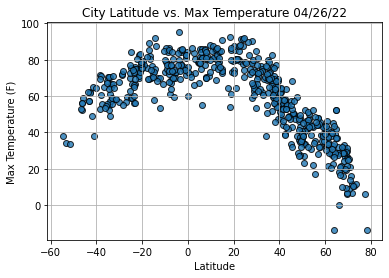

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

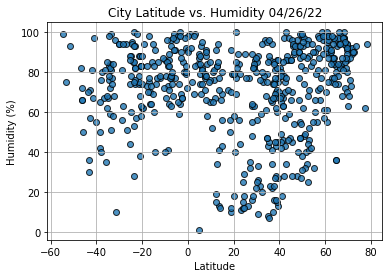

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

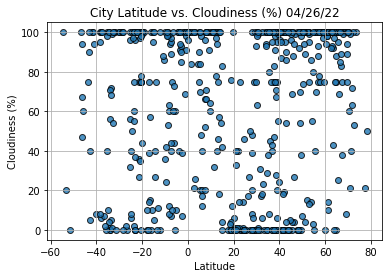

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()